In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def plot_data(X, y):
    plt.figure(figsize=(8,6))

    for i in y:
        plt.plot(X, y[i])

    plt.title("Thermal Conductance Of Different Optimal Structures")
    plt.ylabel("Thermal Conductance")
    plt.xlabel("Calculated Structures")
    plt.legend()

    plt.show()

In [8]:
def plot_all(L_all, X):
    plt.figure(figsize=(12,10))

    for i in range(len(L_all)):
        plt.plot(X, L_all[i])

    plt.title("Thermal Conductance Of Different Optimal Structures")
    plt.ylabel("Thermal Conductance")
    plt.xlabel("Calculated Structures")
    
    plt.show()

In [9]:
def find_max(y):
    max_so_far = 0
    y_max = []

    for i in list(y):
        if i > max_so_far:
            max_so_far = i
            y_max.append(max_so_far)
        else:
            y_max.append(max_so_far)
    
    return np.array(y_max)

In [10]:
def find_min(y):
    min_so_far = 1000
    y_min = []

    for i in list(y):
        if i < min_so_far:
            min_so_far = i
            y_min.append(min_so_far)
        else:
            y_min.append(min_so_far)
    
    return np.array(y_min)

In [11]:
# Create a dictionary to store experiment results
data_d = {}
for i in range(1, 11):
    data_d["data{0}".format(i)] = np.load('results/Si-Ge_1010_max/results'+str(i)+'.npz')
#data_d['data1'].files

# Set X as calculated number of structures, and y as structures' get_reward value
X = np.arange(1, len(data_d['data1']['fx'])+1, 1)
y_d = {}
for i in range(1,11):
    y_d['y{0}'.format(i)] = data_d['data'+str(i)]['fx']

# Create a dictionary of best-so-far values
y_max = {}
for i in range(1,11):
    y_max['y{0}_max'.format(i)] = find_max(y_d['y'+str(i)])
    

In [12]:
# Create a dictionary to store experiment results
data_d = {}
for i in range(1, 11):
    data_d["data{0}".format(i)] = np.load('results/Si-Ge_1010_min/results'+str(i)+'.npz')

# Set X as calculated number of structures, and y as structures' get_reward value
X = np.arange(1, len(data_d['data1']['fx'])+1, 1)
y_d = {}
for i in range(1,11):
    y_d['y{0}'.format(i)] = data_d['data'+str(i)]['fx']

# Create a dictionary of worst-so-far values
y_min = {}
for i in range(1,11):
    y_min['y{0}_min'.format(i)] = find_min(y_d['y'+str(i)])

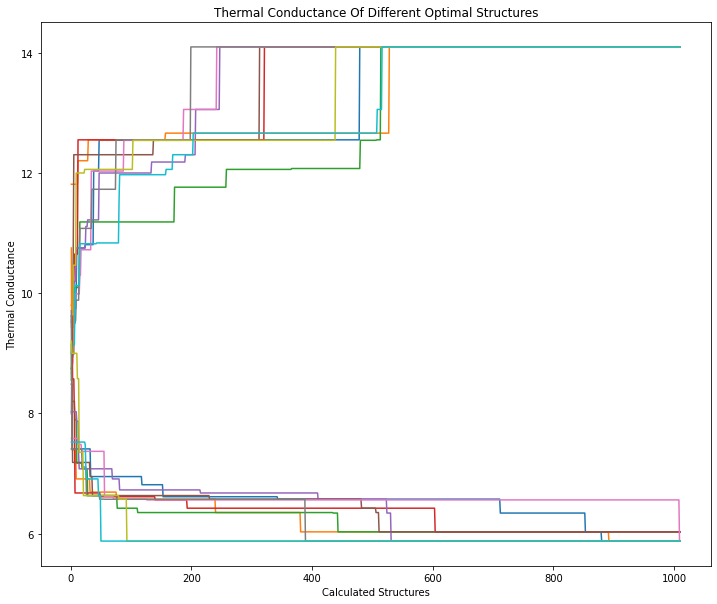

In [13]:
# Plot everything in one graph
L_all = []

for i in y_max.values():
    L_all.append(i)

for i in y_min.values():
    L_all.append(i)

plot_all(L_all, X)

In [14]:
from igraph import *

In [15]:
edges = [(0, 1),
         (1, 2),
         (2, 3),
         (2, 4),
         (2, 5),
         (2, 6),
         (0, 7),
         (7, 8),
         (7, 9),
         (7, 10),
         (10, 11),
         (10, 12),
         (10, 13),
         (10, 14)]

tree = Graph(edges=edges)
tree.vs['label'] = [v.index for v in tree.vs]

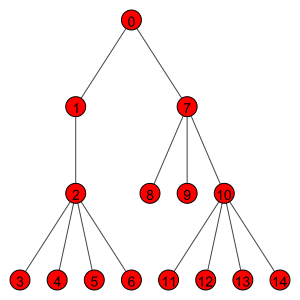

In [16]:
plot(tree,layout=tree.layout('rt',root=[0]),bbox=(300,300))

In [17]:
data_d['data1'].files

['checked_candidates_DS',
 'checked_candidates_size',
 'checked_candidates',
 'fx',
 'optimal_fx',
 'optimal_candidate',
 'best_fx',
 'max_depth_reached',
 'no_nodes',
 'avg_node_visit']

In [18]:
data_d['data1']['checked_candidates'][2]

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [27]:
test_d = {'d1': [0, 0, 0],
          'd2': [0, 1, 0],
          'd3': [0, 1, 1],
          'd4': [0, 0, 1],
          'd5': [1, 1, 0],
          'd6': [1, 1, 1]}
test_d

{'d1': [0, 0, 0],
 'd2': [0, 1, 0],
 'd3': [0, 1, 1],
 'd4': [0, 0, 1],
 'd5': [1, 1, 0],
 'd6': [1, 1, 1]}

In [67]:
ind_d = {'i1': [1, 2, 3]}
same_path = True
count = 3

for i in range(1, len(test_d)):
    temp = []
    for j in range(3):
        if test_d['d'+str(i+1)][j] == test_d['d'+str(i)][j] and same_path==True:
            temp.append(ind_d['i'+str(i)][j])
        else: 
            count += 1
            temp.append(count)
            same_path=False
    ind_d['i'+str(i+1)] = temp
    same_path=True

ind_d

{'i1': [1, 2, 3],
 'i2': [1, 4, 5],
 'i3': [1, 4, 6],
 'i4': [1, 7, 8],
 'i5': [9, 10, 11],
 'i6': [9, 10, 12]}

In [ ]:
edges = [(0, 1),
         (1, 2),
         (2, 3),
         (1, 4),
         (4, 5),
         (4, 6),
         (2, 7),
         (0, 8),
         (8, 9),
         (9, 10),
         (9, 11)]

tree = Graph(edges=edges)
tree.vs['label'] = [v.index for v in tree.vs]
# plot(tree,layout=tree.layout('rt',root=[0]),bbox=(500,500))